# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/UT AI ML PG program/Project 1/foodhub_order.csv') #read the data
df = data.copy() #copy the data

In [ ]:
# Write your code here to view the first 5 rows
df.head() #display first five rows of the dataframe

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape #display the number of rows and columns in the dataframe

(1898, 9)

There are 1898 rows and 9 columns.

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info() #get important information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


The datatypes of different columns are:
- order_id: int64
- customer_id: int64
- restaurant_name: object
- cuisine_type: object
- cost_of_the_order: float64
- day_of_the_week: object
- rating: object
- food_preparation_time: int64
- delivery_time: int64

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum() #get the number of null values in each column

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
df['rating'] = df['rating'].replace('Not given', np.nan).astype(float) #replace 'Not given' with 'NaN' and change the dtype to float
df.head() #display first five rows after the changes

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


There aren't any missing values in any columns, except the 'Not given' values in rating column which were replaced with NaN values.

In [ ]:
df.isnull().sum() #get the number of null values in each column after the changes have been made

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


There are 736 missing values in the rating column.

In [ ]:
#replace the NaN values in rating column with the mean of ratings
#mean_rating = df['rating'].mean()
#df['rating'].fillna(mean_rating, inplace=True)
#df['rating'].isnull().sum()

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe() #check the statistical summary of the data

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


The minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20 minutes, 27.37 minutes, and 35 minutes respectively.

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].isnull().sum() #get the null values in rating column

736

There were 736 orders that were not rated.

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Write the code here
df['order_id'].nunique() #get the number of unique values in order_id column

1898

There are 1898 unique values for order_id i.e. each order id is unique.

In [ ]:
df['customer_id'].nunique() #get the number of unique values in customer_id column

1200

There are 1200 unique values for customer_id i.e. 1200 customers have ordered food and some customers have ordered food more than once.

In [ ]:
df['restaurant_name'].nunique() #get the number of unique values in restaurant_name column

178

There are 178 different restaurants.

In [ ]:
df['cuisine_type'].nunique() #get the number of unique values in cuisine_type column

14

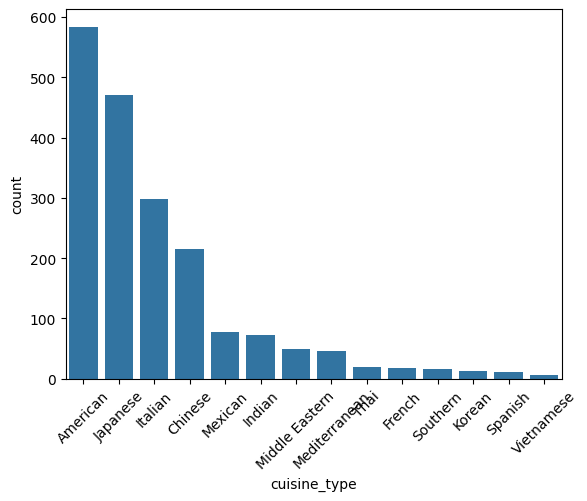

In [ ]:
#plot the histogram for cuisine_type
cuisine_order = df['cuisine_type'].value_counts().index #set the order of cuisines based on the number of types they were ordered
sns.countplot(data=df, x='cuisine_type', order=cuisine_order)
plt.xticks(rotation=45) #rotate the xticks by 45 degrees
plt.show() #show the plot

There are 14 unique cuisine types. Most customers have ordered American food from restaurants. The second most ordered food type is Japanese. The third and fourth most ordered cuisine types are Italian and Chinese. After Chinese, the most ordered food types are Mexican, Indian, Middle Eastern, Mediterranean, Thai, French, Southern, Korean, and Spanish in order. Customers order Vietnamese food the least.

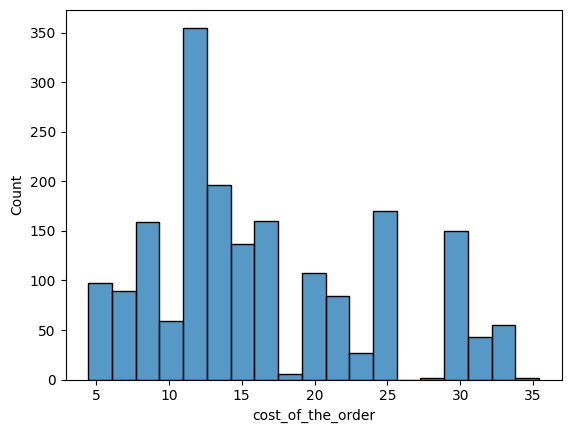

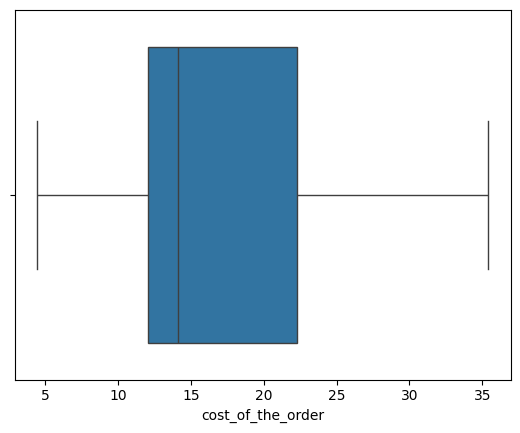

In [ ]:
#plot the histogram for cost of the order
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show() #display the plot

#plot the boxplot for cost of the order
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() #display the plot

Most customers have ordered food between 5 USD and $20, with a right skewed distribution.

In [ ]:
#get the unique values in day_of_the_week column
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

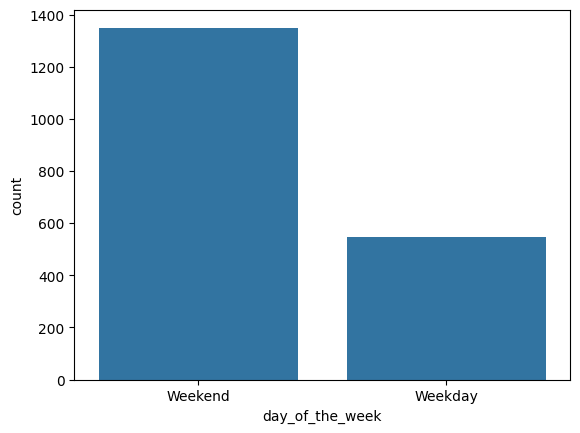

In [ ]:
#plot the countplot for day_of_the_week column
sns.countplot(data=df, x='day_of_the_week')
plt.show() #display the plot

Most customers order food during the weekend. More than 2x food gets ordered on weekend than on weekdays.

In [ ]:
#get the unique values for rating column
df['rating'].unique()

array([nan,  5.,  3.,  4.])

Customers have given 5, 4, and 3 star ratings to the food orders. None of the food orders have gotten 1 or 2 star ratings.

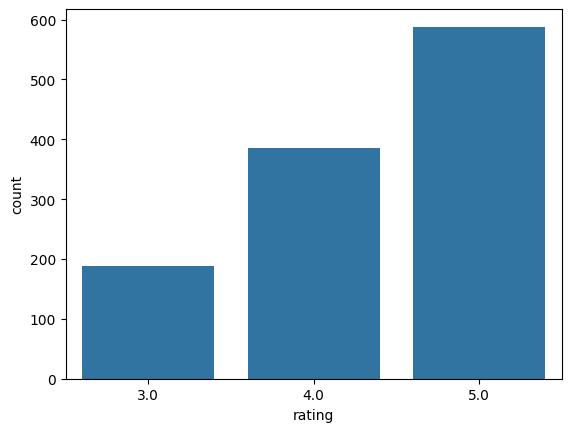

In [ ]:
#plot the countplot for rating column
sns.countplot(data=df, x='rating')
plt.show()

Most customers have given 5 star ratings to food orders. Around 390 customers have give 4 star ratings, and around 190 customers have given 3 star ratings. There are 736 NaN values in the rating column.

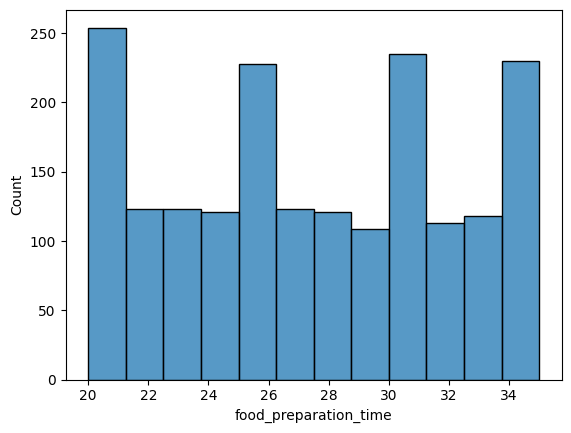

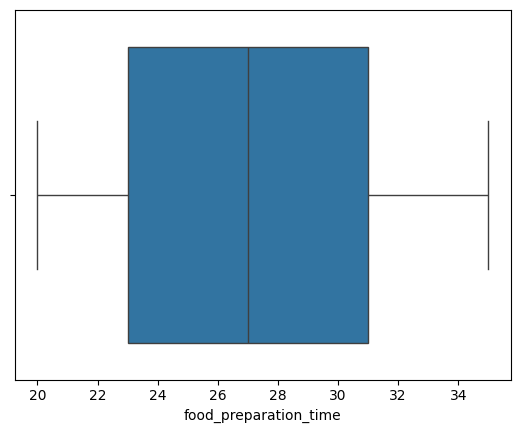

In [ ]:
#plot the histogram for food_preparation_time column
sns.histplot(data=df, x='food_preparation_time')
plt.show()

#plot the boxplot for food_preparation_time column
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

Food preparation time clusters around 25–30 minutes, ranging from 20 to 35 minutes. The average food preparation time is around 27 minutes. The maximum preparation time is 35 minutes, and the minimum food preparation time is 20 minutes.

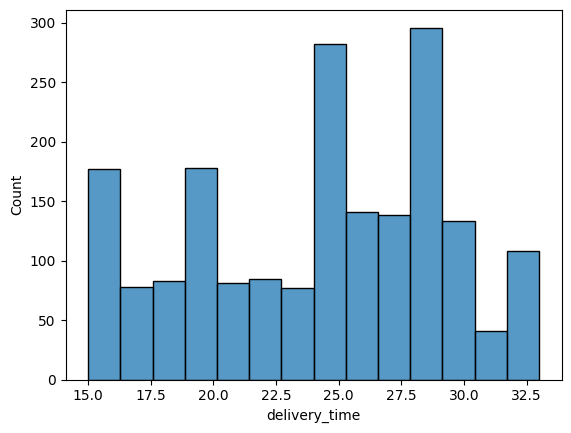

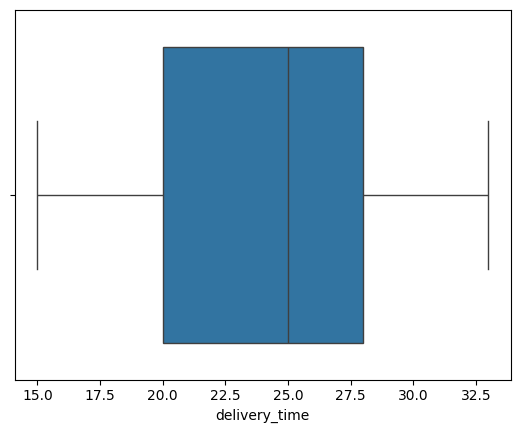

In [ ]:
#plot the histogram for delivery_time column
sns.histplot(data=df, x='delivery_time')
plt.show()

#plot the boxplot for delivery_time column
sns.boxplot(data=df, x='delivery_time')
plt.show()

The delivery time generally ranges from 10 to 30 minutes; most common around 20–28 minutes. The delivery time is skewed towards left. The average delivery time is 24 minutes. The maximum delivery time is 33 minutes, and the minimum delivery time is 15 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)
#df['restaurant_name]: selects the 'restaurant_name' column in df
#.value_counts(): calculates the frequency of each unique restaurant name in the column

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

#create a filter for weekend in day_of_the_week column
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].unique() #returns an array containing only the unique cuisine types ordered on weekends

array(['Korean', 'Japanese', 'American', 'Italian', 'Mexican',
       'Mediterranean', 'Chinese', 'Indian', 'Thai', 'Southern', 'French',
       'Spanish', 'Middle Eastern', 'Vietnamese'], dtype=object)

The most popular cuisine on weekends is Korean.

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

#create a filter for the orders that cost more than $20
cost_more_than_20 = df[df['cost_of_the_order'] > 20]

#calculate the percentage by dividing number of rows in the filter by total number of rows in df and multiplying by 100
percentage = (cost_more_than_20).shape[0]/df.shape[0] * 100
round(percentage, 2) #round the value to two decimal places

29.24

Approximately, 29.24% of the orders cost more than 20 dollars.

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

#calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
round(mean_delivery_time, 2) #round the value to two decimal places

24.16

The mean order delivery time is 24.16 minutes.

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3) #display the top 3 most occurring customers

,customer_id
52832,13
47440,10
83287,9


The customer IDs of the top 3 most frequent customers are 52832 (13 orders), 47440 (10 orders), and 83287 (9 orders).

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

#create lists of variables for reference
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time'] #create a list for numerical variables
cat_var = ['cuisine_type', 'day_of_the_week'] #create a list for categorical values

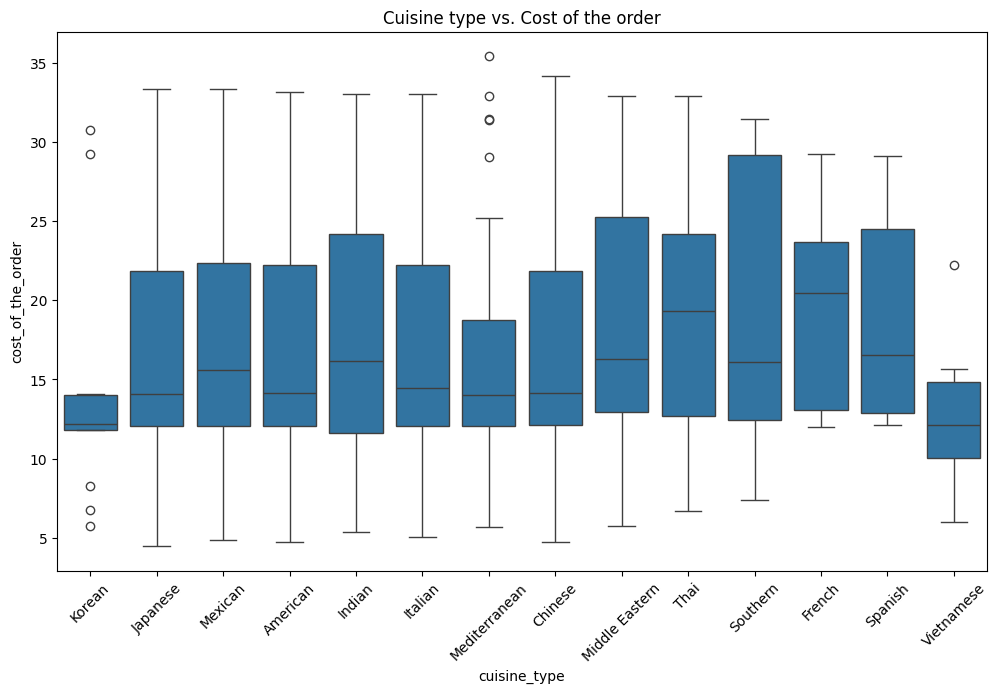

In [ ]:
#plot a boxplot for cuisine type vs. cost of the order
plt.figure(figsize=(12,7)) #size of the figure
plt.title('Cuisine type vs. Cost of the order') #title of the plot
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 45) #rotate the xticks by 45 degrees
plt.show() #display the plot

- Korean and Vietnamese seem to have the lowest median cost.
- French and Thai appear to have amonng the highest median cost.
- Mediterranean cuisine seems to have the most expensive food order due to its outlier.
- Japanese cuisine type seems to have the cheapest food order.
- These cuisine types have outliers for cost: Korean, Mediterranean, and Vietnamese.

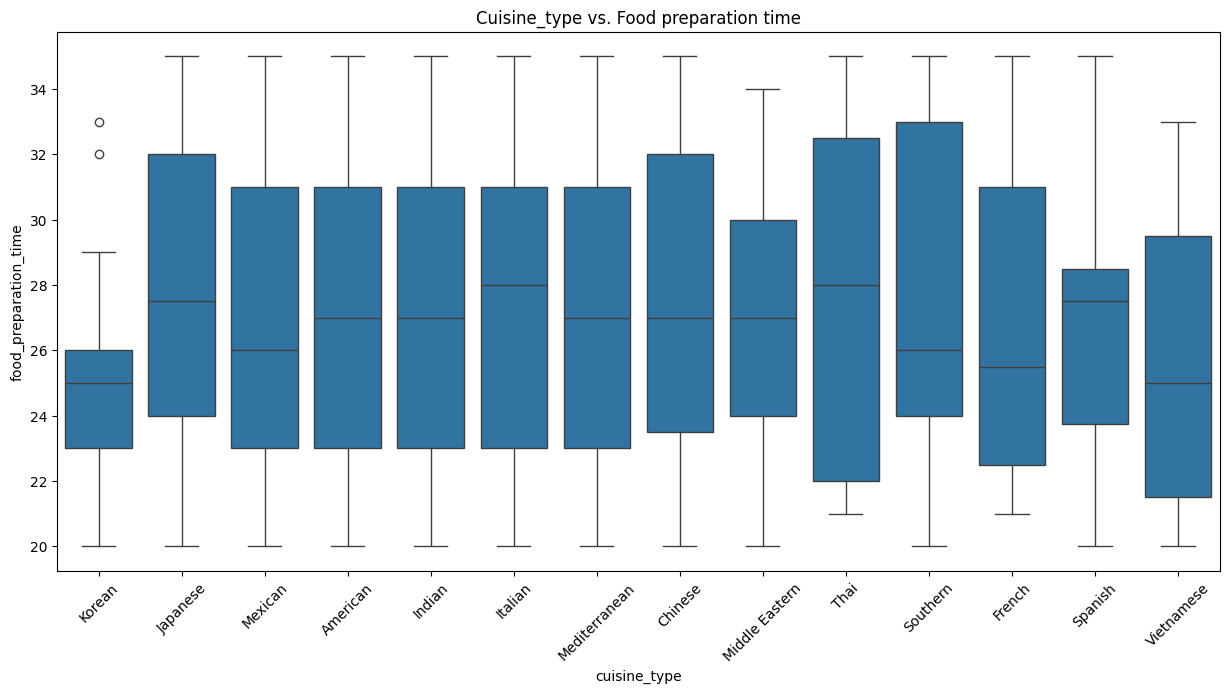

In [ ]:
#create a boxplot for cuisine type vs. food preparation time
plt.figure(figsize=(15,7))
plt.title("Cuisine_type vs. Food preparation time") #title of the plot
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 45) #rotate the xticks by 45 degree to prevent overlapping
plt.show() #display the plot

- Most cuisine types seem to have around the same maximum time for food preparation except Korean, Middle Eastern, and Vietnamese.
- Most cuisine types also have similar minimum time for food preparation except Thai, and French which have slightly higher mimimum time for food preparation.
- Only Korean food has outliers for food preparation time.

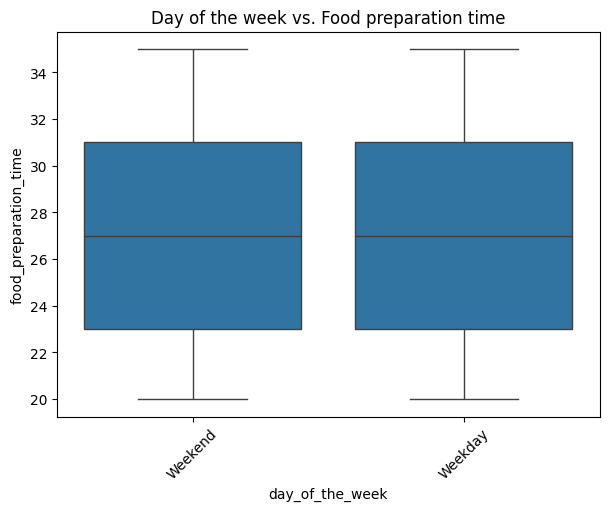

In [ ]:
#create a boxplot for day of the week vs. food preparation time
plt.figure(figsize=(7,5))
plt.title('Day of the week vs. Food preparation time')
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df)
plt.xticks(rotation = 45)
plt.show()

It takes around same time to prepare food on weekends and weekdays.

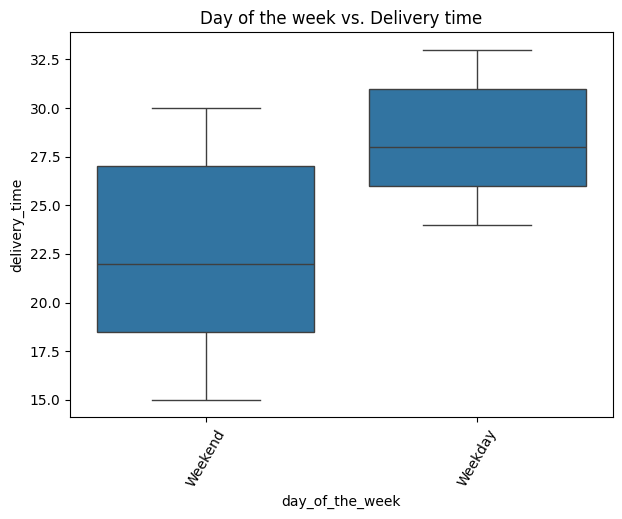

In [ ]:
#create a boxplot for day of the week vs delivery time
plt.figure(figsize=(7,5))
plt.title('Day of the week vs. Delivery time')
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

It seems that it takes longer for food delivery on weekdays than on weekends.

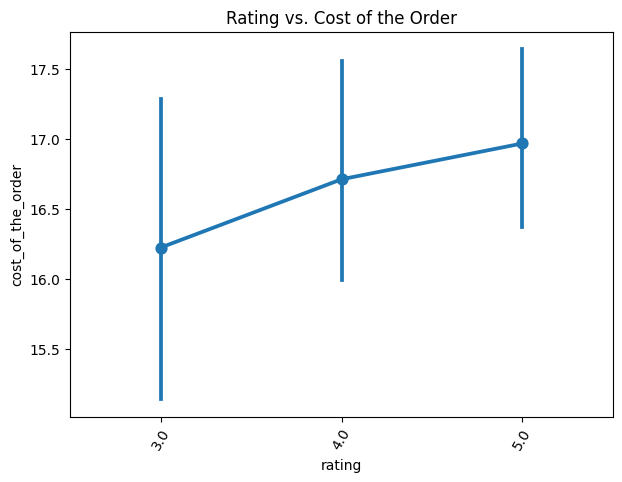

In [ ]:
#create a pointplot for rating vs. cost of the order
plt.figure(figsize=(7,5))
plt.title('Rating vs. Cost of the Order')
sns.pointplot(x = "rating", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

The rating for orders with higher cost seems to have a higher rating.

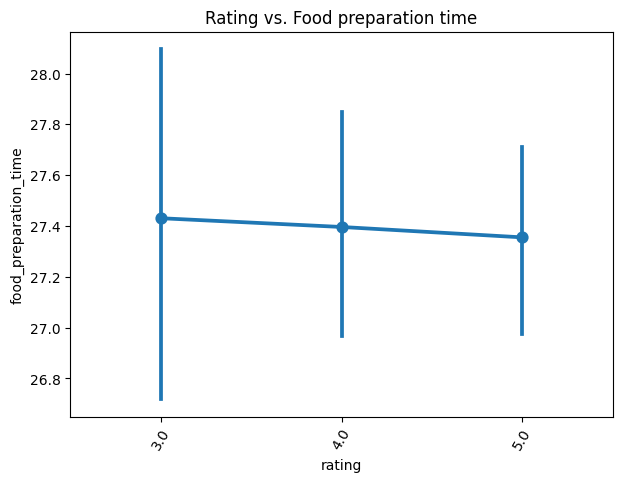

In [ ]:
#create a pointplot for rating vs. food preparation time
plt.figure(figsize=(7,5))
plt.title('Rating vs. Food preparation time')
sns.pointplot(x = "rating", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

There's also slight chance that food that takes shorter time to prepare also has higher rating.

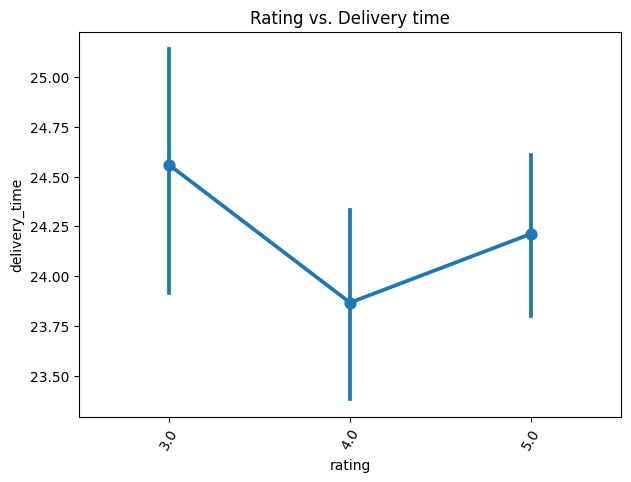

In [ ]:
#create a pointplot for rating vs. delivery time
plt.figure(figsize=(7,5))
plt.title('Rating vs. Delivery time')
sns.pointplot(x = "rating", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

Lower delivery time might be increasing the rating of the food, but it seems like other factors account more towards the rating of the food than delivery time.

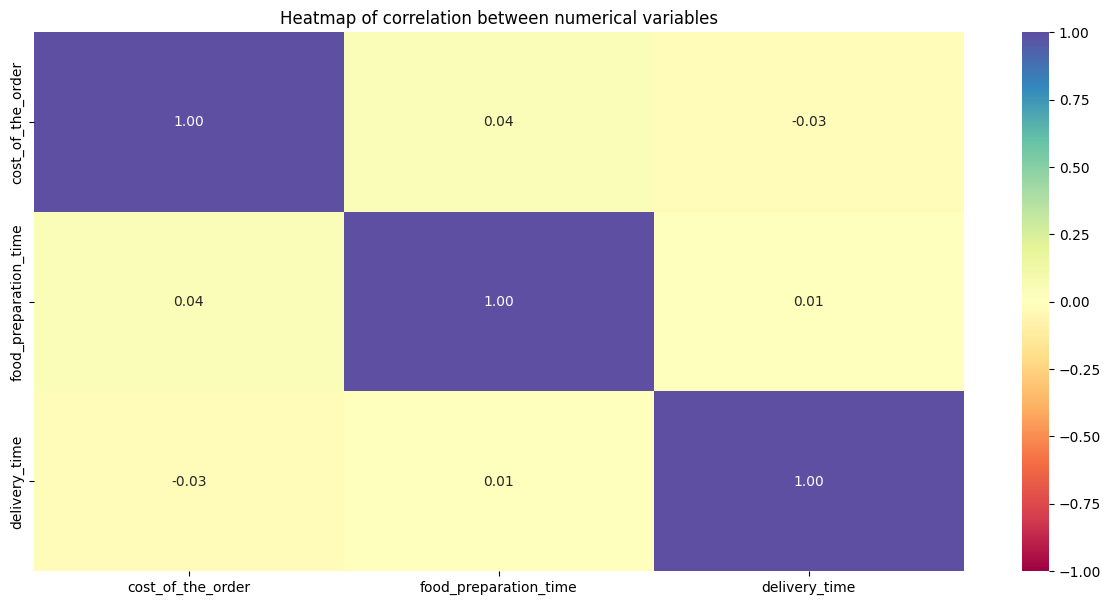

In [ ]:
#create a heatmap to find if there's any correlation between the numerical variables
plt.figure(figsize=(15, 7))
plt.title('Heatmap of correlation between numerical variables')
sns.heatmap(df[num_var].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The heatmap shows that there wasn't much correlation between the numerical variables as the highest corr value is 0.04.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

# Group by restaurant and calculate rating count and mean rating
restaurant_rating_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter for promotional offer conditions: count > 50 and mean > 4
eligible_restaurants = restaurant_rating_stats[
    (restaurant_rating_stats['count'] > 50) &
    (restaurant_rating_stats['mean'] > 4)
]

# Reset index for display
eligible_restaurants = eligible_restaurants.reset_index()
eligible_restaurants.columns = ['Restaurant Name', 'Rating Count', 'Average Rating']

# Show the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants.sort_values(by='Average Rating', ascending=False))

Restaurants eligible for the promotional offer:
             Restaurant Name  Rating Count  Average Rating
3          The Meatball Shop            84        4.511905
0  Blue Ribbon Fried Chicken            64        4.328125
2                Shake Shack           133        4.278195
1          Blue Ribbon Sushi            73        4.219178


The restaurants that fulfill the criteria are:
1. The Meatball Shop, with an average rating of 4.52 from 84 ratings.
2. The Blue Ribbon Fried Chicken, with an average rating of 4.33 from 64 ratings.
3. Shake Shack, with an average rating of 4.28 from 133 ratings.
4. Blue Ribbon Sushi, with an average rating of 4.22 from 73 ratings.

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

# Vectorized revenue calculation
conditions = [
    (df['cost_of_the_order'] > 20),
    (df['cost_of_the_order'] > 5)
]
choices = [
    df['cost_of_the_order'] * 0.25,
    df['cost_of_the_order'] * 0.15
]
df['revenue'] = np.select(conditions, choices, default=0)

# Calculate total revenue
total_revenue = df['revenue'].sum()
print(f"Net revenue generated by the company: ${total_revenue:.2f}")

Net revenue generated by the company: $6166.30


The company generates 6166.30 dollars revenue on all orders when it charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than $5.

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

# Create a new column for total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate number of orders with total time > 60 minutes
long_orders = df[df['total_time'] > 60].shape[0]

# Calculate total number of orders
total_orders = df.shape[0]

# Calculate percentage
percentage_long_orders = (long_orders / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_long_orders:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#The mean delivery time on weekdays
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

#The mean delivery time on weekends
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')


The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

##Conclusions
1. **Cuisine Popularity**

* Certain cuisines like **Indian**, **Italian**, and **American** received the highest number of orders.
* Less popular cuisines such as **Vietnamese** and **Mediterranean** have fewer orders, but some show strong customer satisfaction.

2. **Customer Feedback and Ratings**

* Most orders received ratings above 4, indicating generally **high customer satisfaction**.
* However, a small number of orders with **lower ratings** were often linked to **longer preparation or delivery times**.


3. **Cost vs. Satisfaction**

* Higher costs didn’t necessarily lead to better ratings.
* Affordable cuisines like **Indian** often performed well in both **order volume** and **ratings**, suggesting a strong value proposition.


📅 4. **Day-wise Insights**

* Slight increases in delivery and prep time were noted on weekends.
* Customer satisfaction did not drastically dip, suggesting acceptable tolerance.

5. **Promotional Strategy**

* Only a subset of restaurants met the criteria for high rating count and average rating > 4.

##Recommendations
- Focus promotional efforts on top-performing cuisines to sustain demand. For underrepresented but highly-rated cuisines, invest in targeted advertising to expand their reach.
- Introduce **real-time order tracking** and improve **kitchen workflows** for high-prep cuisines (e.g., Japanese, Italian) to reduce waiting times and enhance customer experience.
- Highlight value-for-money options in promotions. Consider **bundle offers** or discounts on high-rated but affordable cuisines to increase conversion.
- Ensure **extra staffing or delivery fleet** availability on weekends to maintain service levels and avoid overburdening operations.
- Feature these **top-rated restaurants** in marketing campaigns. Encourage others to improve via performance incentives based on customer feedback.

---

In [ ]:
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving Learner_Notebook_Full_Code.ipynb to Learner_Notebook_Full_Code.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>